# Importing the Required Libraries

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
X, Y = make_classification(n_samples=400, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=3, n_features=2)

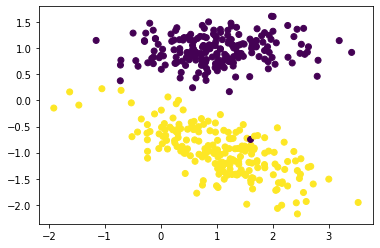

In [3]:
plt.scatter(X[:,0], X[:,1], c = Y)

In [4]:
Y[Y==0] = -1
Y

array([-1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
       -1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,
       -1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1,
       -1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,
       -1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
       -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,
        1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,
       -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,
        1, -1,  1, -1, -1

# Custom SVM Classifier

In [5]:
class SVM:
    def __init__(self, C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def HingeLoss(self, X,W,Y,b):
        loss = 0.0
        loss += 0.5 * np.dot(W, W.T)
        m = X.shape[0]
        for i in range(m):
            ti = Y[i] * (np.dot(W,X[i].T)+b)
            loss += self.C * max(0, 1-ti)
        return loss[0][0]
    
    def fit(self, X,Y, batch_size = 100, learning_rate = 0.001, maxItr = 300):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        W = np.zeros((1, no_of_features))
        c = self.C
        bias = 0
        losses = []
        for i in range(maxItr):
            l = self.HingeLoss(X,W,Y,bias)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            for batch_start in (0, no_of_samples, batch_size):
                gradw = 0.0
                gradb = 0.0
                for j in range(batch_start, batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(W, X[i].T)+bias)
                        if ti>1:
                            gradw += 0.0
                            gradb += 0.0
                        else:
                            gradw += c*X[i]*Y[i]
                            gradb += c*Y[i]
                            
                W = W - n*W + n*gradw
                bias = bias + n*gradb
            
        self.W = W
        self.b = bias
        return W, bias, losses
        

In [6]:
svm_ob = SVM(C=1000)
W, b, losses = svm_ob.fit(X, Y)
print(losses[0], losses[-1])

400000.0 10765.764923285813


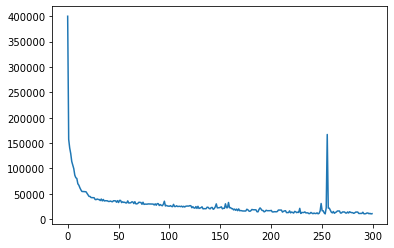

In [7]:
plt.plot(losses)

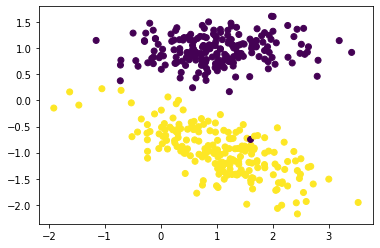

In [8]:
plt.scatter(X[:,0], X[:,1], c=Y)

In [9]:
print(W, b)

[[ -3.72340826 -17.20246694]] 3.0


# Visualizing the Hyperplanes

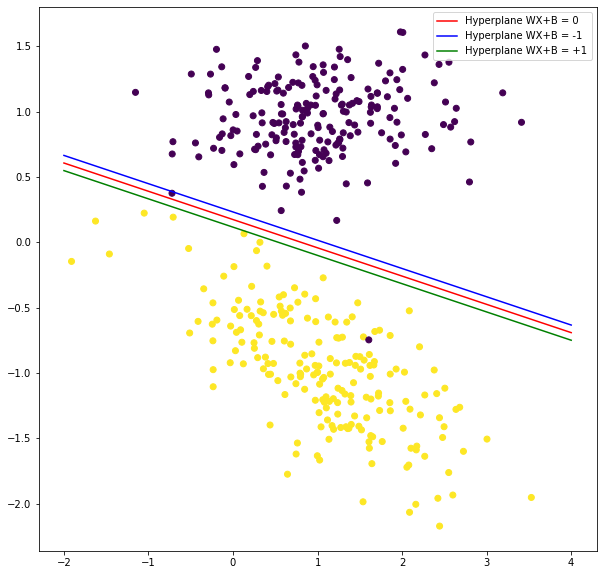

In [10]:
def plotHyperplane(w1,w2,b):
    plt.figure(figsize=(10,10))
    x1 = np.linspace(-2,4)
    x2 = -(w1*x1+b)/w2
    x_p = -(w1*x1+b+1)/w2
    x_n = -(w1*x1+b-1)/w2
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.plot(x1,x2, color='red', label = 'Hyperplane WX+B = 0')
    plt.plot(x1,x_p, color='blue', label= 'Hyperplane WX+B = -1')
    plt.plot(x1,x_n, color='green', label= 'Hyperplane WX+B = +1')
    plt.legend()
    plt.show()
    
plotHyperplane(W[0][0],W[0][1],b)